# Notes #
1. Data preparation
    + Why do we have to use normalization in this  
    specific case?


**Rough notes**  
1. 

---

**Data preparation**

In [1]:

# Load CSV using Pandas
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("ad.data.csv", delimiter=",", header=None, index_col=False)

# Check for columns that contain missing values #

data = data.applymap(lambda val: np.nan if str(val).strip() == '?' else val)
data = data.dropna()


# Label encoding #

lb = LabelEncoder()
Y = lb.fit_transform(data.iloc[:, -1])

X = data.iloc[:,:-1]

# Normalize the X values #
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Split into test and train #
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=0)


X.shape


C:\Users\shakk\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2359, 1558)

---

**Keras Model**

In [2]:
# Keras #

### Logistic regression using DNN ###
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

np.random.seed(7)

# Defining model #

model = Sequential()
model.add(Dense(1,input_dim=1558,activation='sigmoid'))

# Compile the model #

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model #

model.fit(x_train, y_train, epochs=500, batch_size=100)

# Evaluate the model #

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Using TensorFlow backend.


Epoch 1/500
943/943 [==============================] - 2s 2ms/step - loss: 0.7868 - acc: 0.5376
Epoch 2/500
943/943 [==============================] - 0s 46us/step - loss: 0.5768 - acc: 0.7402
Epoch 3/500
943/943 [==============================] - 0s 82us/step - loss: 0.4583 - acc: 0.8420
Epoch 4/500
943/943 [==============================] - 0s 42us/step - loss: 0.3814 - acc: 0.8887
Epoch 5/500
943/943 [==============================] - 0s 44us/step - loss: 0.3249 - acc: 0.9279
Epoch 6/500
943/943 [==============================] - 0s 40us/step - loss: 0.2846 - acc: 0.9438
Epoch 7/500
943/943 [==============================] - 0s 26us/step - loss: 0.2517 - acc: 0.9555
Epoch 8/500
943/943 [==============================] - 0s 44us/step - loss: 0.2256 - acc: 0.9608
Epoch 9/500
943/943 [==============================] - 0s 40us/step - loss: 0.2048 - acc: 0.9618
Epoch 10/500
943/943 [==============================] - 0s 40us/step - loss: 0.1865 - acc: 0.9671
Epoch 11/500
943/943 [========

943/943 [==============================] - 0s 35us/step - loss: 0.0200 - acc: 0.9958
Epoch 168/500
943/943 [==============================] - 0s 34us/step - loss: 0.0200 - acc: 0.9958
Epoch 169/500
943/943 [==============================] - 0s 35us/step - loss: 0.0198 - acc: 0.9958
Epoch 170/500
943/943 [==============================] - 0s 37us/step - loss: 0.0197 - acc: 0.9958
Epoch 171/500
943/943 [==============================] - 0s 36us/step - loss: 0.0197 - acc: 0.9958
Epoch 172/500
943/943 [==============================] - 0s 36us/step - loss: 0.0196 - acc: 0.9958
Epoch 173/500
943/943 [==============================] - 0s 32us/step - loss: 0.0195 - acc: 0.9958
Epoch 174/500
943/943 [==============================] - 0s 35us/step - loss: 0.0194 - acc: 0.9958
Epoch 175/500
943/943 [==============================] - 0s 32us/step - loss: 0.0193 - acc: 0.9958
Epoch 176/500
943/943 [==============================] - 0s 33us/step - loss: 0.0192 - acc: 0.9958
Epoch 177/500
943/943 [=

943/943 [==============================] - 0s 33us/step - loss: 0.0115 - acc: 0.9968
Epoch 332/500
943/943 [==============================] - 0s 33us/step - loss: 0.0115 - acc: 0.9968
Epoch 333/500
943/943 [==============================] - 0s 38us/step - loss: 0.0115 - acc: 0.9968
Epoch 334/500
943/943 [==============================] - 0s 22us/step - loss: 0.0115 - acc: 0.9968
Epoch 335/500
943/943 [==============================] - 0s 33us/step - loss: 0.0115 - acc: 0.9968
Epoch 336/500
943/943 [==============================] - 0s 33us/step - loss: 0.0114 - acc: 0.9968
Epoch 337/500
943/943 [==============================] - 0s 33us/step - loss: 0.0114 - acc: 0.9968
Epoch 338/500
943/943 [==============================] - 0s 33us/step - loss: 0.0114 - acc: 0.9968
Epoch 339/500
943/943 [==============================] - 0s 33us/step - loss: 0.0113 - acc: 0.9968
Epoch 340/500
943/943 [==============================] - 0s 33us/step - loss: 0.0113 - acc: 0.9968
Epoch 341/500
943/943 [=

943/943 [==============================] - 0s 33us/step - loss: 0.0084 - acc: 0.9989
Epoch 496/500
943/943 [==============================] - 0s 20us/step - loss: 0.0085 - acc: 0.9989
Epoch 497/500
943/943 [==============================] - 0s 50us/step - loss: 0.0084 - acc: 0.9989
Epoch 498/500
943/943 [==============================] - 0s 33us/step - loss: 0.0084 - acc: 0.9989
Epoch 499/500
943/943 [==============================] - 0s 39us/step - loss: 0.0084 - acc: 0.9989
Epoch 500/500
1416/1416 [==============================] - 0s 45us/step

acc: 94.35%


---

**Scikit model**

In [3]:
# Scikit learn #

# Import and create an instance of your model(Logistic regression)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

# Train your model using the training dataset

logisticRegr.fit(x_train,y_train)

# Predict the output 

predictions = logisticRegr.predict(x_test)
print(predictions)

score = logisticRegr.score(x_test,y_test)
print(score)


[1 1 1 ... 1 1 1]
0.9477401129943502


---

**Kfold validation**

In [4]:
# Validation #
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

seed = 7
numpy.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(1,input_dim=1558,activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], Y[train], epochs=500, batch_size=100, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


acc: 95.36%
acc: 95.34%
acc: 97.03%
acc: 95.76%
acc: 96.19%
acc: 95.76%
acc: 98.73%
acc: 97.03%
acc: 94.89%
acc: 96.60%
96.27% (+/- 1.07%)


---

**Classification Report**

In [6]:
from sklearn.metrics import classification_report

target_names = ['ad', 'not ad']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

         ad       0.97      0.98      0.97       232
     not ad       1.00      0.99      0.99      1184

avg / total       0.99      0.99      0.99      1416



---

**ROC Curve and Confusion matrix**

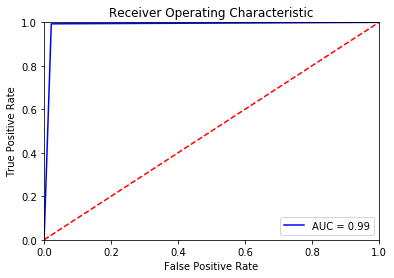

[[ 227    5]
 [   8 1176]]


In [7]:
# Prediction #
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

---

# Pending #
1. 